In [1]:
# pip install shap
# I noticed the SHAP didn't work with venv39
import shap
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("white_wine_cleaned.csv")

In [2]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [3]:
# I define features of other variables and 
# target variable
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [5]:
y = df['quality']

In [6]:
# The data then split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
# Training the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

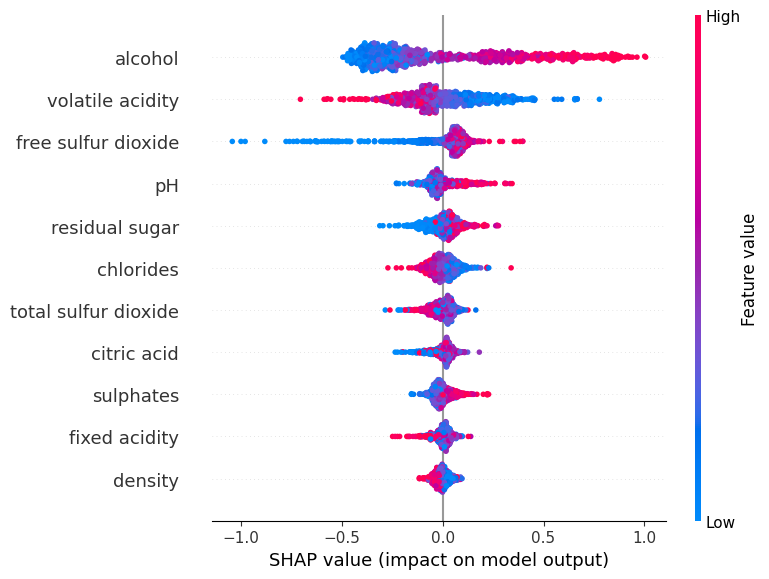

In [8]:
# I initialize the SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Here plotting the SHAP summary
shap.summary_plot(shap_values, X_test)

In [9]:
# Feature the importance variables
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.mean(np.abs(shap_values), axis=0)
})
print("Feature Importances using SHAP:")
print(importance)

Feature Importances using SHAP:
                 Feature  Importance
0          fixed acidity    0.027921
1       volatile acidity    0.149013
2            citric acid    0.037056
3         residual sugar    0.054410
4              chlorides    0.046048
5    free sulfur dioxide    0.109756
6   total sulfur dioxide    0.040032
7                density    0.026537
8                     pH    0.057056
9              sulphates    0.035283
10               alcohol    0.322740
